In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
class SGD:
    def __init__(self, fit_intercept=True, normalize=False):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
    
    def _check(self, X, y):
        if not isinstance(X, list):
            raise ValueError('X is not a list')
        elif not isinstance(y, list):
            raise ValueError('y is not a list')
        else:
            X_array = np.array(X)
            y_array = np.array(y)
        
        if X_array.shape[0] != y_array.shape[0]:
            raise ValueError(f'number of rows in X and y is not equal')

        self.X = X_array
        self.y = y_array
        
    def _add_intercept(self):     
        if self.fit_intercept:
            x0_array = np.ones([self.X.shape[0], 1])
            self.X = np.concatenate((x0_array, self.X), axis=1)
            
    def _make_normalized(self):
        if self.normalize:
            norm = np.linalg.norm(self.X, axis=1, keepdims=True)
            self.X = self.X / norm
            
    def _compute_loss(self):
        m = self.X.shape[0]
        h = np.dot(self.X, self.theta)
        loss =np.sum((h - y) ** 2) / (2 * m)
        return loss
    
    def _compute_hypothesis(self, theta):
        return np.dot(self.X, theta)
            
    def _descend_gradient(self, alpha, num_iter):
        m = self.X.shape[0]
        num_features = self.X.shape[1]
        theta = np.zeros((num_features, 1))
        
        for i in range(num_iter):
            h = self._compute_hypothesis(theta)
            error = h - y
            temp_X = np.dot(error.T, self.X)
            theta = theta - (alpha / m)  * (temp_X.T)
        return theta

    def fit(self, X, y):
        # checking X and y and making numpy arrays
        self._check(X, y)

        # if normalize add normalization
        self._make_normalized()
        
        # if fit_intercept adding column with one numbers
        self._add_intercept()
        
        self.theta = self._descend_gradient(alpha=0.01, num_iter=1000)
    
    def predict(self, x_test):
        x_test = np.array(x_test)
        x0_array = np.ones([self.X.shape[0], 1])
        x_test = np.concatenate((x0_array, x_test), axis=1)
        print(x_test)
        return np.dot(x_test, self.theta)

**Linear Regression**

the formula for linear regression is $\hat{Y} = \beta_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $. 
It can be solved using $\frac{\partial RSS}{\partial{\beta}} = 0$


In [29]:
class LinearRegression():
    def __init__(self, fit_intercept=False):
        self.fit_intercept = fit_intercept
        
    def _add_intercept(self):     
        if self.fit_intercept:
            x0_array = np.ones([self.X.shape[0], 1])
            self.X = np.concatenate((x0_array, self.X), axis=1)
        
    def fit(self, X, Y):
        self._add_intercept()
        X_X = X.T @ X
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y
        
    def predict(self, X):
        return X @ self.beta
    
class Ridge(LinearRegression):
    def __init__(self, alpha=0.1, **kwargs):
        super(LinearRegression, self).__init__(**kwargs)
        self.alpha = alpha
        
    def fit(self, X, Y):
        alpha_mat = np.eye(X.shape[1]) * self.alpha
        X_X = X.T @ X - alpha_mat
        X_Y = X.T @ Y
        self.beta = np.linalg.inv(X_X) @ X_Y

In [39]:
x = ([[1], [2], [5]])
y = ([[2], [4], [7]])

model = SGD()
model.fit(x, y)

In [40]:
y_pred = model.predict(x)

[[1. 1.]
 [1. 2.]
 [1. 5.]]


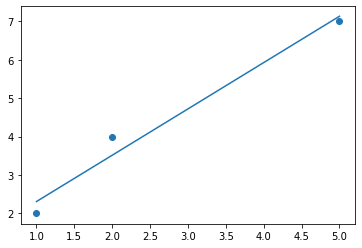

In [41]:
plt.scatter(x, y)
plt.plot(x, y_pred)